In [60]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [61]:
(X_train,y_train) , (X_test,y_test)= keras.datasets.mnist.load_data()

In [62]:
len(X_train)

60000

In [63]:
len(X_test)

10000

In [64]:
X_train[0].shape

(28, 28)

In [65]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

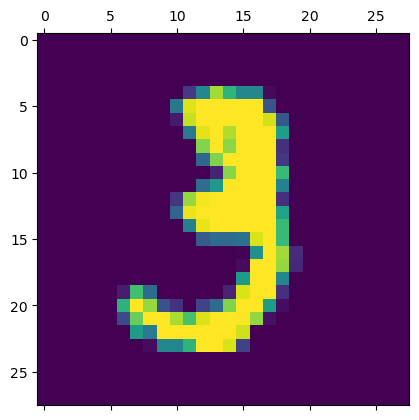

In [66]:
plt.matshow(X_train[10])

In [67]:
y_train[10]

3

In [68]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [69]:
X_train.shape

(60000, 28, 28)

In [70]:
#Scaling it to between 0 and 1 by diving with 255

In [71]:
X_train=X_train/255
X_test=X_test/255

In [72]:
#Flatten the shape of input from 28*28 dimension to single dimension of 784

In [73]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)



In [74]:
#we can used keras.layers.Flatten(input_shape=(28,28)) as well. I've used it below

In [75]:
#X_train_flattened.shape

In [76]:
#X_test_flattened.shape

In [77]:
#X_train_flattened[0]

In [78]:
#Model without hidden layer

In [79]:
model =keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4665 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9253


In [80]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9266


[0.26844847202301025, 0.9265999794006348]

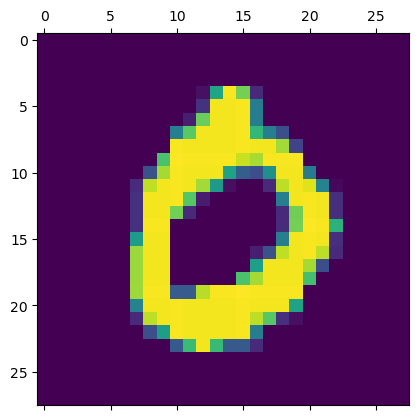

In [81]:
plt.matshow(X_test[3])

In [82]:
y_predicted=model.predict(X_test_flattened)
y_predicted[3]

313/313 [==============================] - 1s 2ms/step


array([9.99626994e-01, 1.93991312e-08, 1.20192148e-01, 3.36661725e-03,
       5.50893274e-05, 1.21905461e-01, 1.37395620e-01, 8.36150069e-03,
       2.16201376e-02, 1.38173485e-02], dtype=float32)

In [83]:
predicted_output=np.argmax(y_predicted[3])
predicted_output

0

In [84]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [85]:
conf_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    6,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   9,    9,  923,   14,    7,    2,   13,    9,   42,    4],
       [   4,    0,   24,  906,    0,   33,    2,    9,   26,    6],
       [   1,    1,    5,    1,  914,    0,   13,    4,   11,   32],
       [  10,    3,    3,   22,    7,  790,   15,    4,   33,    5],
       [  10,    3,    5,    1,    7,   11,  917,    2,    2,    0],
       [   1,    9,   27,    5,    9,    1,    0,  941,    4,   31],
       [   8,    8,    7,   15,    9,   23,    9,    7,  881,    7],
       [  11,    8,    1,    9,   31,    8,    0,   16,    7,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

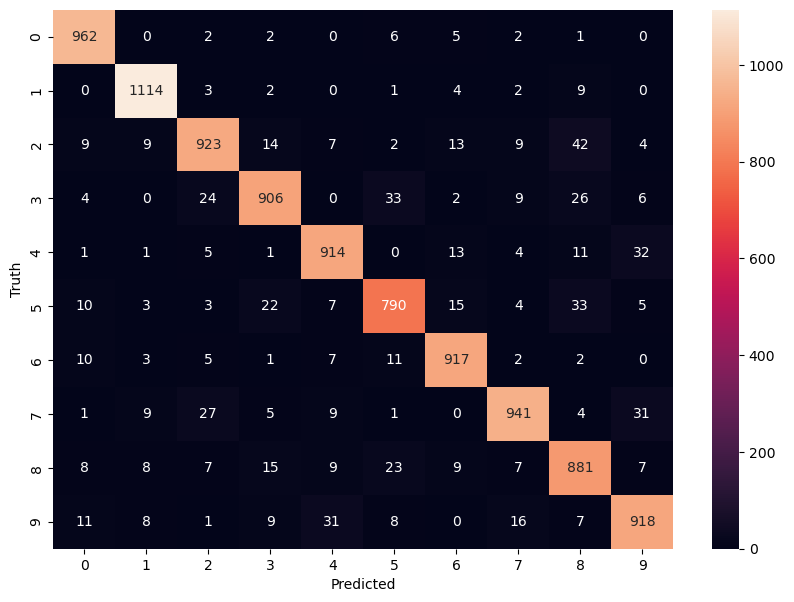

In [86]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
#model after adding hidden layer and keras flatten

In [88]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2853 - accuracy: 0.9194
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1320 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0918 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0686 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0548 - accuracy: 0.9829


In [89]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9730


[0.08495845645666122, 0.9729999899864197]

313/313 [==============================] - 1s 2ms/step


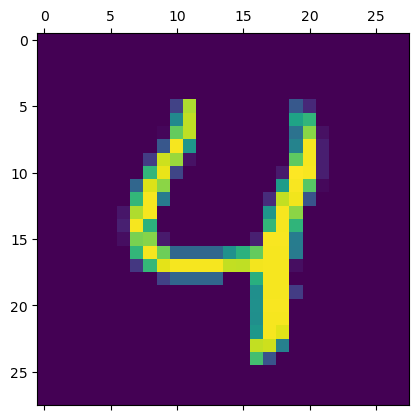

In [90]:
plt.matshow(X_test[4])
y_predicted=model.predict(X_test)
predicted_output=np.argmax(y_predicted[4])

In [91]:
print("Predicted Digit Output is " , predicted_output)

Predicted Digit Output is  4


In [92]:
conf_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    6,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   9,    9,  923,   14,    7,    2,   13,    9,   42,    4],
       [   4,    0,   24,  906,    0,   33,    2,    9,   26,    6],
       [   1,    1,    5,    1,  914,    0,   13,    4,   11,   32],
       [  10,    3,    3,   22,    7,  790,   15,    4,   33,    5],
       [  10,    3,    5,    1,    7,   11,  917,    2,    2,    0],
       [   1,    9,   27,    5,    9,    1,    0,  941,    4,   31],
       [   8,    8,    7,   15,    9,   23,    9,    7,  881,    7],
       [  11,    8,    1,    9,   31,    8,    0,   16,    7,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

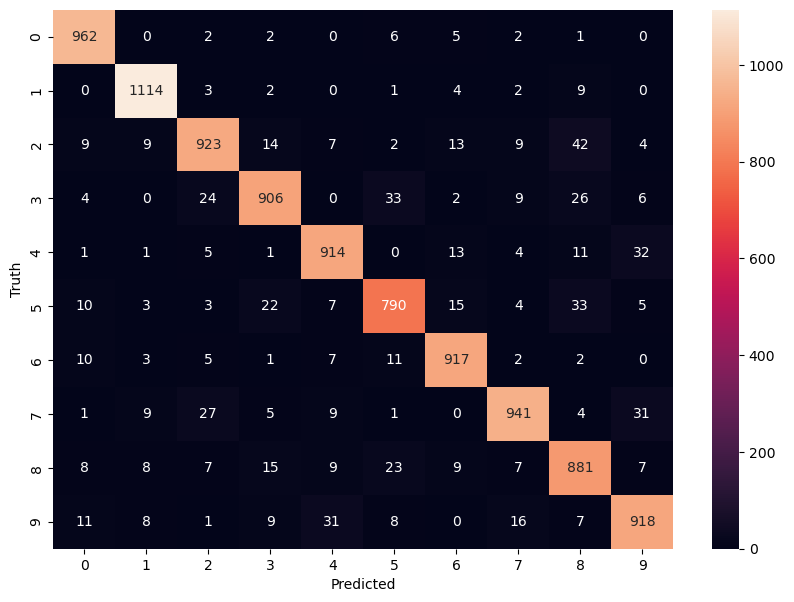

In [93]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')